20/10/2024

In questo notebook vengono definite le regole del gioco del mulino tramite funzioni



In [6]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

def crea_tabellone():
    """
    Crea un tabellone vuoto per il gioco del mulino rappresentato come un grafo.
    Restituisce un dizionario dove le chiavi sono i nodi e i valori sono liste di nodi adiacenti.
    """
    grafo = defaultdict(list)
    
    # Definizione delle connessioni
    connessioni = [
        (0, 1), (1, 2),
        (3, 4), (4, 5),
        (6, 7), (7, 8),
        (9, 10), (10, 11), (11, 12), (12, 13), (13, 14),
        (15, 16), (16, 17),
        (18, 19), (19, 20),
        (21, 22), (22, 23),
        (0, 9), (9, 21),
        (3, 10), (10, 18),
        (6, 11), (11, 15),
        (1, 4), (4, 7),
        (16, 19), (19, 22),
        (8, 12), (12, 17),
        (5, 13), (13, 20),
        (2, 14), (14, 23)
    ]
    
    for a, b in connessioni:
        grafo[a].append(b)
        grafo[b].append(a)
    
    return grafo, {nodo: 0 for nodo in range(24)}  # 0 rappresenta una posizione vuota

def mossa_valida(tabellone, posizione_attuale, nuova_posizione):
    """
    Verifica se una mossa è valida sul tabellone.
    """
    grafo, stato = tabellone
    return (nuova_posizione in grafo[posizione_attuale] and 
            stato[nuova_posizione] == 0)

def controlla_mulino(tabellone, posizione, giocatore):
    """
    Controlla se si è formato un mulino dopo l'ultima mossa.
    """
    grafo, stato = tabellone
    # Definizione dei mulini possibili
    mulini = [
        [0, 1, 2], [3, 4, 5], [6, 7, 8],
        [9, 10, 11], [12, 13, 14], [15, 16, 17],
        [18, 19, 20], [21, 22, 23],
        [0, 9, 21], [3, 10, 18], [6, 11, 15],
        [1, 4, 7], [16, 19, 22],
        [8, 12, 17], [5, 13, 20], [2, 14, 23]
    ]
    
    for mulino in mulini:
        if posizione in mulino and all(stato[p] == giocatore for p in mulino):
            return True
    return False

def esegui_mossa(tabellone, posizione, giocatore):
    """
    Esegue una mossa sul tabellone per il giocatore specificato.
    """
    grafo, stato = tabellone
    if stato[posizione] == 0:
        stato[posizione] = giocatore
        return controlla_mulino(tabellone, posizione, giocatore)
    return False

def gioco_finito(tabellone):
    """
    Verifica se il gioco è finito (un giocatore ha meno di 3 pedine).
    """
    _, stato = tabellone
    pedine_giocatore1 = sum(1 for v in stato.values() if v == 1)
    pedine_giocatore2 = sum(1 for v in stato.values() if v == 2)
    return pedine_giocatore1 < 3 or pedine_giocatore2 < 3

def visualizza_tabellone(tabellone):
    """
    Visualizza il tabellone del gioco del mulino.
    """
    grafo, stato = tabellone
    
    # Definizione delle coordinate dei nodi
    posizioni = {
        0: (0, 6), 1: (3, 6), 2: (6, 6),
        3: (1, 5), 4: (3, 5), 5: (5, 5),
        6: (2, 4), 7: (3, 4), 8: (4, 4),
        9: (0, 3), 10: (1, 3), 11: (2, 3),
        12: (4, 3), 13: (5, 3), 14: (6, 3),
        15: (2, 2), 16: (3, 2), 17: (4, 2),
        18: (1, 1), 19: (3, 1), 20: (5, 1),
        21: (0, 0), 22: (3, 0), 23: (6, 0)
    }
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Disegna le linee del tabellone
    for nodo in grafo:
        x, y = posizioni[nodo]
        for vicino in grafo[nodo]:
            x2, y2 = posizioni[vicino]
            ax.plot([x, x2], [y, y2], 'k-', linewidth=1)
    
    # Disegna i nodi e le pedine
    for nodo, valore in stato.items():
        x, y = posizioni[nodo]
        if valore == 0:
            ax.plot(x, y, 'ko', markersize=10, markerfacecolor='none')
        elif valore == 1:
            ax.plot(x, y, 'ko', markersize=20, markerfacecolor='white')
        else:
            ax.plot(x, y, 'ko', markersize=20, markerfacecolor='black')
    
    ax.set_xlim(-1, 7)
    ax.set_ylim(-1, 7)
    ax.axis('off')
    plt.tight_layout()
    plt.show()


Grafo del tabellone:
defaultdict(<class 'list'>, {0: [1, 9], 1: [0, 2, 4], 2: [1, 14], 3: [4, 10], 4: [3, 5, 1, 7], 5: [4, 13], 6: [7, 11], 7: [6, 8, 4], 8: [7, 12], 9: [10, 0, 21], 10: [9, 11, 3, 18], 11: [10, 12, 6, 15], 12: [11, 13, 8, 17], 13: [12, 14, 5, 20], 14: [13, 2, 23], 15: [16, 11], 16: [15, 17, 19], 17: [16, 12], 18: [19, 10], 19: [18, 20, 16, 22], 20: [19, 13], 21: [22, 9], 22: [21, 23, 19], 23: [22, 14]})

Stato iniziale del tabellone:
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0}

Eseguiamo alcune mosse:
Mossa giocatore 1: False
Mossa giocatore 2: False
Mossa giocatore 1: False
Mossa giocatore 2: False
Mossa giocatore 1: False
Stato del tabellone dopo le mosse:
{0: 1, 1: 2, 2: 1, 3: 2, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0}

Il gioco è finito? True


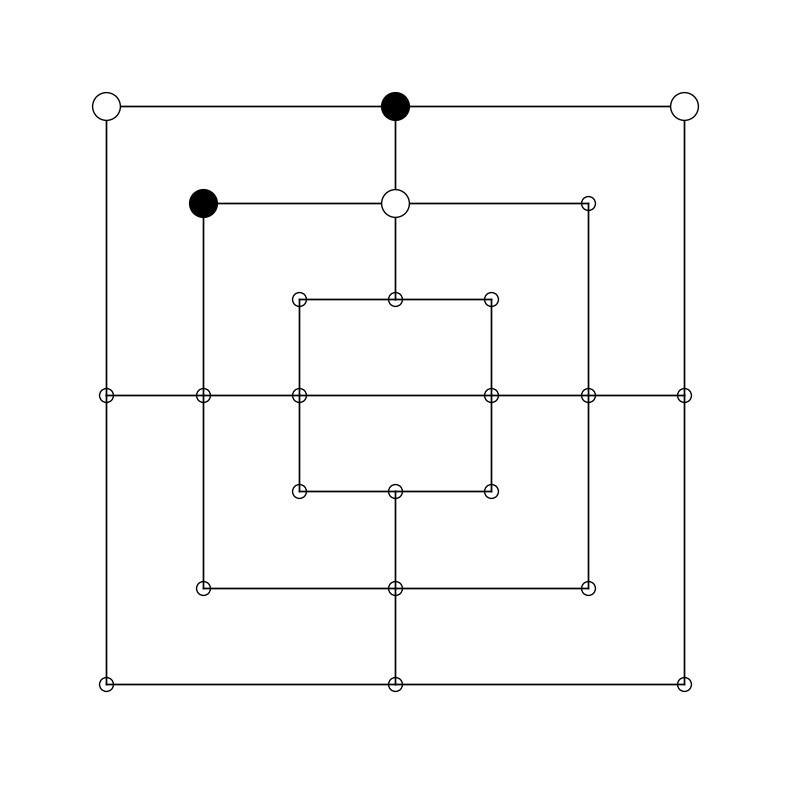

In [8]:
# Test delle funzioni
if __name__ == "__main__":
    grafo, stato = crea_tabellone()
    print("Grafo del tabellone:")
    print(grafo)
    print("\nStato iniziale del tabellone:")
    print(stato)
    
    # Esempio di alcune mosse
    print("\nEseguiamo alcune mosse:")
    print("Mossa giocatore 1:", esegui_mossa((grafo, stato), 0, 1))
    print("Mossa giocatore 2:", esegui_mossa((grafo, stato), 1, 2))
    print("Mossa giocatore 1:", esegui_mossa((grafo, stato), 2, 1))
    print("Mossa giocatore 2:", esegui_mossa((grafo, stato), 3, 2))
    print("Mossa giocatore 1:", esegui_mossa((grafo, stato), 4, 1))
    print("Stato del tabellone dopo le mosse:")
    print(stato)
    
    print("\nIl gioco è finito?", gioco_finito((grafo, stato)))
    
    # Visualizza il tabellone
    visualizza_tabellone((grafo, stato))